### Read and analyze the data

In [ ]:
# load the data
import pandas as pd

data = pd.read_csv('test_20221229-170850.csv')
data.shape

(10080, 8)

In [ ]:
data.describe()

,0,1,2,3,4,5,label
count,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000
mean,0.013729,2.334369,-5.833151,7.324147,-0.013380,-0.014152,0.044544
std,7.871191,0.899803,2.388289,9.797248,1.282976,3.007093,0.206310
min,-13.510469,-4.275409,-9.311421,-12.849228,-9.061302,-14.370142,0.000000
25%,-6.755046,2.206916,-8.065087,-2.235180,-1.040214,-2.555225,0.000000
50%,0.017257,2.275798,-5.868010,-0.126897,-0.009748,0.001477,0.000000
75%,6.753784,2.344966,-3.692576,17.147911,1.031183,2.540532,0.000000
max,13.521363,18.770111,13.966778,19.490305,13.207133,5.863343,1.000000


* The data does not contain any missing values.

In [ ]:
data.head(10)

,timestamp,0,1,2,3,4,5,label
0,2000-01-01 00:00:00,-2.921177,2.083477,-6.488737,16.515459,-2.014216,5.061644,0.0
1,2000-01-01 00:01:00,-1.360445,2.378744,-7.389464,-1.562625,-2.085953,-5.127811,0.0
2,2000-01-01 00:02:00,0.479262,2.262509,-8.586176,-0.172492,-1.817725,-4.823953,0.0
3,2000-01-01 00:03:00,2.022919,2.260818,-8.849445,-0.554255,-1.731176,-4.721789,0.0
4,2000-01-01 00:04:00,3.474873,2.204536,-8.952654,-1.298479,-1.475573,-4.370664,0.0
5,2000-01-01 00:05:00,4.685156,2.228174,-8.236882,-2.723674,-1.399758,-4.101545,0.0
6,2000-01-01 00:06:00,5.821604,2.156772,-7.388140,-3.523645,-1.314052,-3.686074,0.0
7,2000-01-01 00:07:00,6.528876,2.362378,-6.116817,-3.373235,-1.086327,-3.483847,0.0
8,2000-01-01 00:08:00,7.169923,2.395268,-4.818367,-2.219368,-0.997620,-3.050887,0.0
9,2000-01-01 00:09:00,7.564919,2.323422,-3.727896,-0.999290,-0.668124,-2.740994,0.0


* The data consists of 8 columns ( **timestamp, 0, 1, 2, 3, 4, 5, label** ) and 10080 rows.
* The first row is a timestamp starting from 2000-01-01 00:00:00 with difference of 1 minute.

In [ ]:
data.dtypes

timestamp     object
0            float64
1            float64
2            float64
3            float64
4            float64
5            float64
label        float64
dtype: object

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp']) # convert object type column to proper datetime type
data.dtypes

timestamp    datetime64[ns]
0                   float64
1                   float64
2                   float64
3                   float64
4                   float64
5                   float64
label               float64
dtype: object

### Plot the data

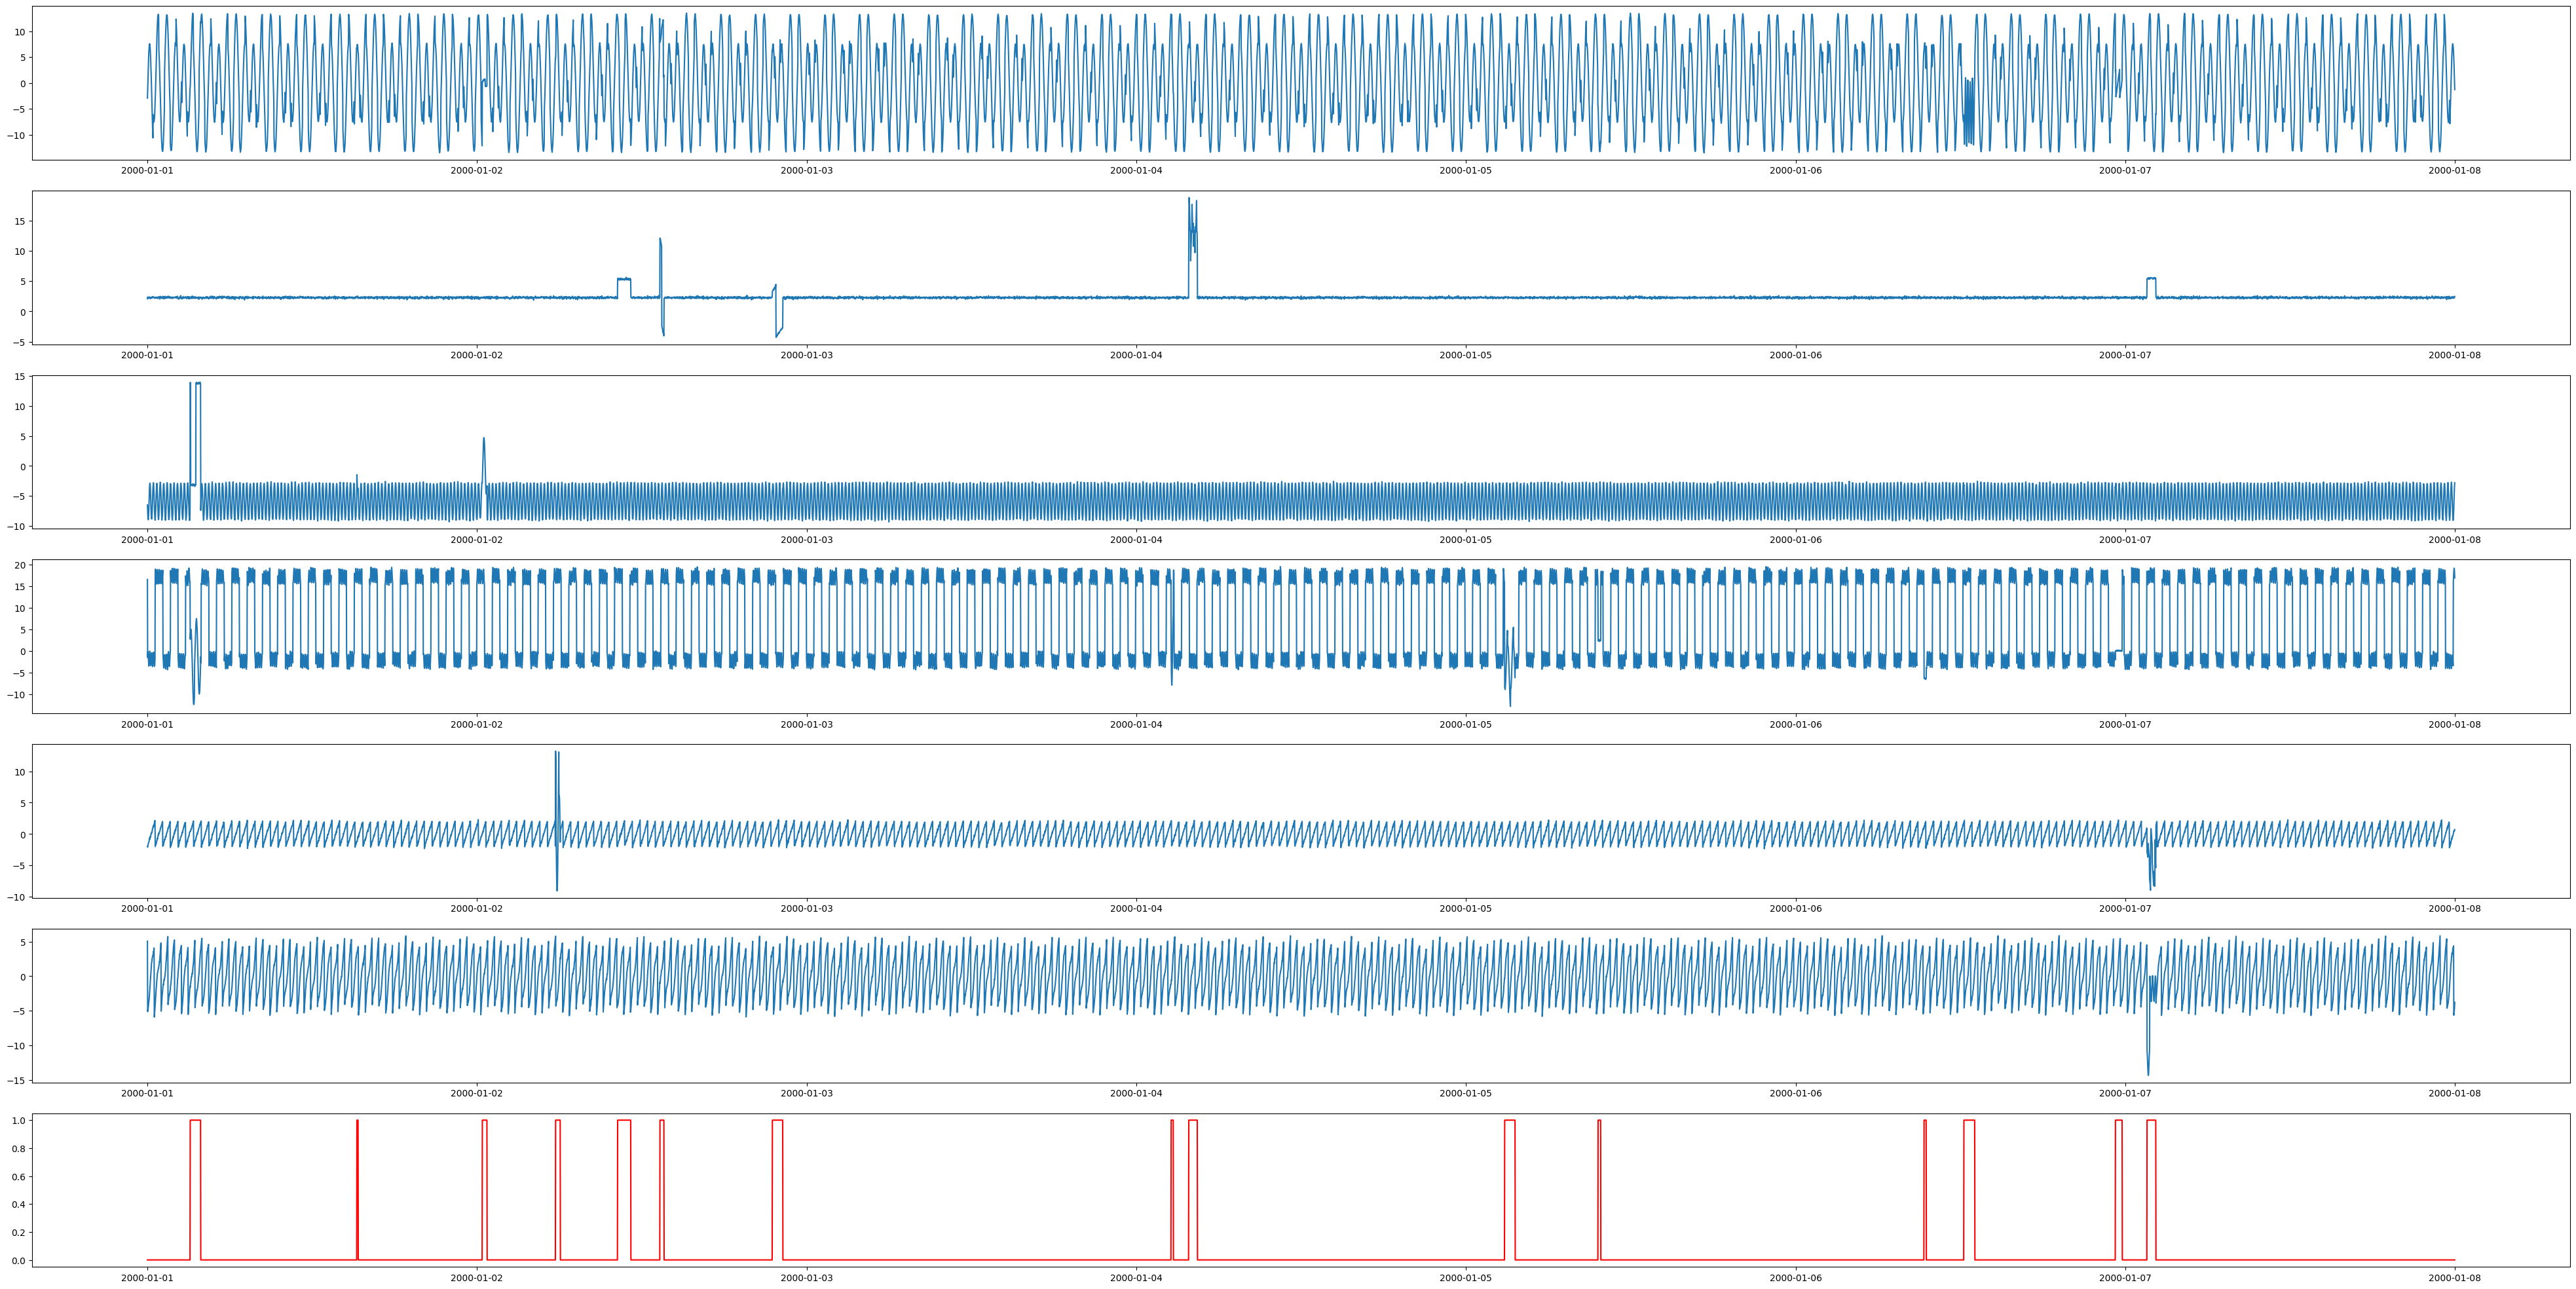

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(7)

fig.set_figwidth(50)
fig.set_figheight(25)

for i in range(6):
  axs[i].plot(data['timestamp'], data[str(i)])
axs[6].plot(data['timestamp'], data['label'], color='r')

fig.show()

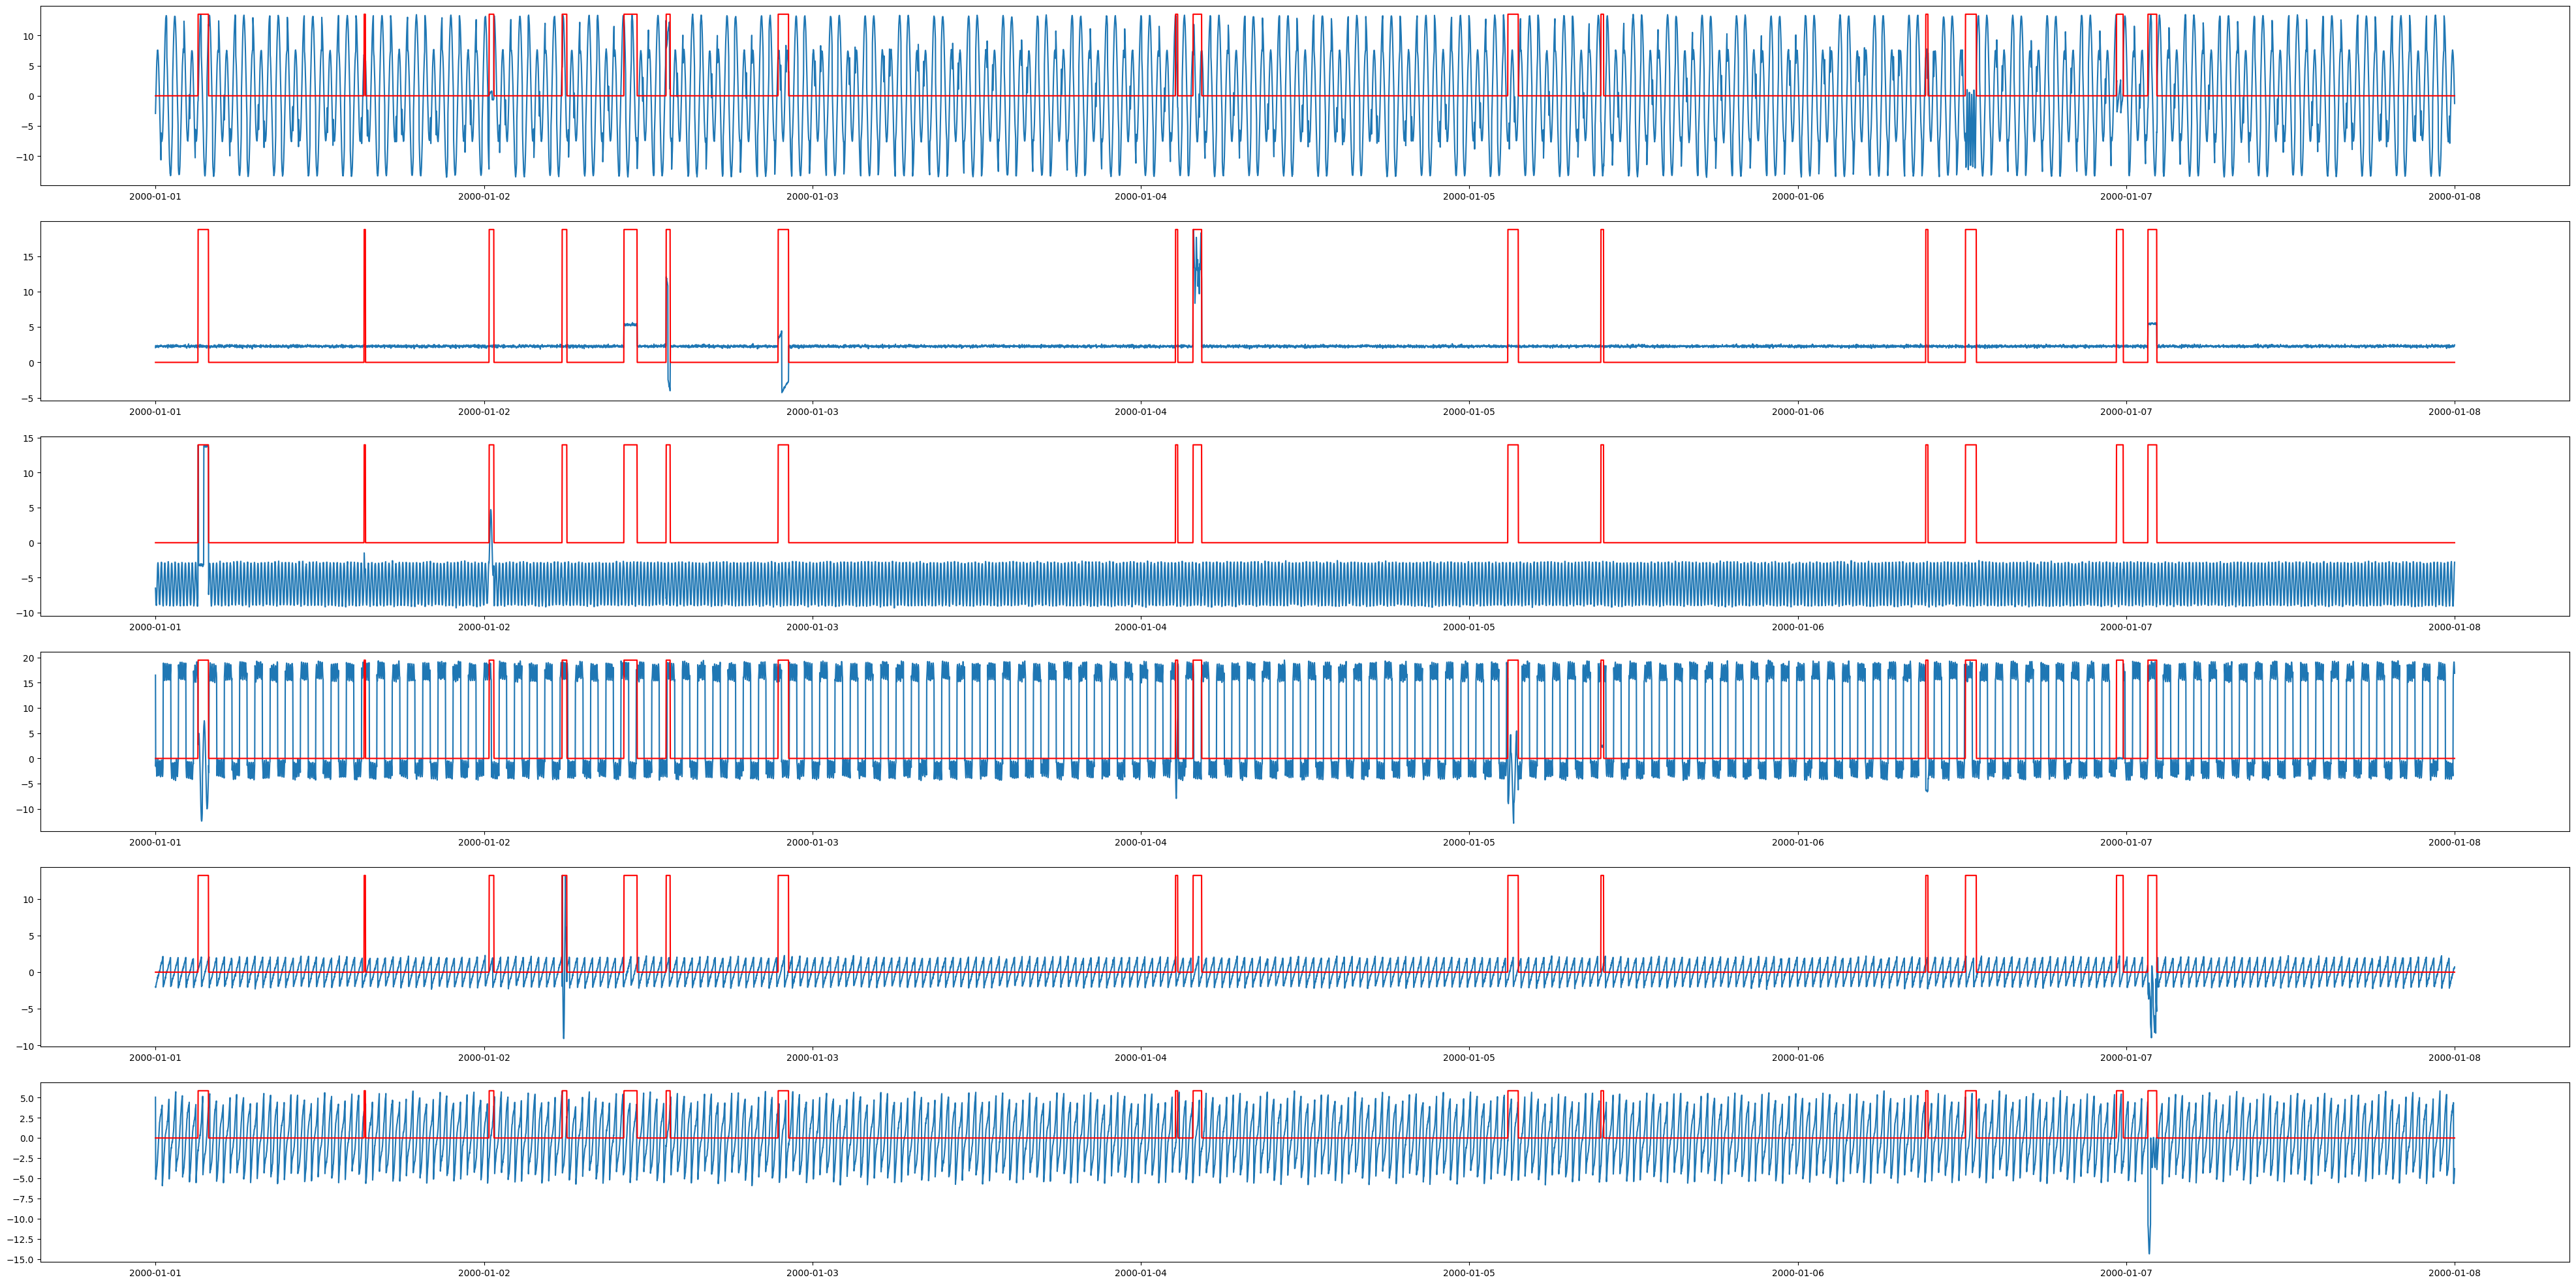

In [ ]:
# the same plot but with the overlaying the last figure over the other figures

fig, axs = plt.subplots(6)

fig.set_figwidth(50)
fig.set_figheight(25)

for i in range(6):
  axs[i].plot(data['timestamp'], data[str(i)])
  axs[i].plot(data['timestamp'], data['label'] * max(data[str(i)]), color='r')

fig.show()

The label column coincides with the anomalies in one or several time-series. The task is to correctly predict the label column using other 6 columns. Since the label is given, supervised machine learning algorithm should be used. I will use Random Forest Classifier from sklearn library.

In [ ]:
contamination = sum(data['label']) / data.shape[0]
print(f'The level of contamination by anomalies is {contamination * 100 : .2f}%')

The level of contamination by anomalies is  4.45%


We can see above that the data is higly imbalanced towards normal values. In other words, there are only a few anomalies compared to the whole data. During the training of model, we should take this into account by choosing proper class weights.

### Random Forest Classifier

In [ ]:
# divide data into train and test set

from sklearn.model_selection import train_test_split

X, y = data.iloc[:, 1:-1], data['label']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0) # 25% of data is chosen for model testing

In [ ]:
# train random forest clasifier
from sklearn.ensemble import RandomForestClassifier

# balanced subsample automatically assign class weights using proportion of 0 labels and 1 labels
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=0)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

from sklearn.metrics import accuracy_score
print(accuracy_score(test_y, pred_y))

0.9892857142857143


In [ ]:
pd.DataFrame(pred_y).describe()

,0
count,2520.000000
mean,0.038889
std,0.193369
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
print(f'{sum(pred_y)} out of {pred_y.size} are identified by a model as an anomalies')

98.0 out of 2520 are identified by a model as an anomalies


THe high value of accuracy is due to highly unblanced data. It correctly identified many normal points but out task is to accurately identify anomalies.

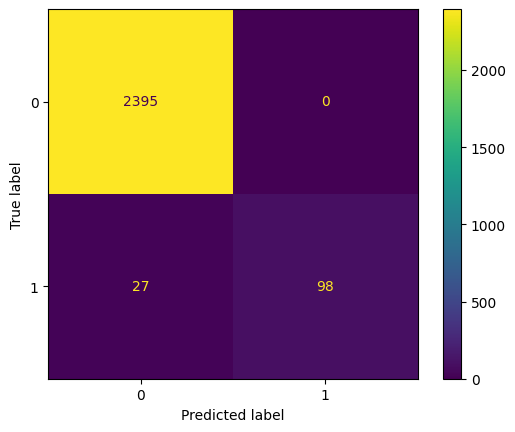

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_y, pred_y, labels=[0, 1])
disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
disp.plot();

From the above, we can see that the TP (true positive anomalious values) is 98 and FN (false negative anomalious values) is 27.

In [ ]:
TP, TN = 98, 27
acc = TP / (TP + TN)

print(f'The accuracy of model for identifying anomalies is {acc}')

The accuracy of model for identifying anomalies is 0.784


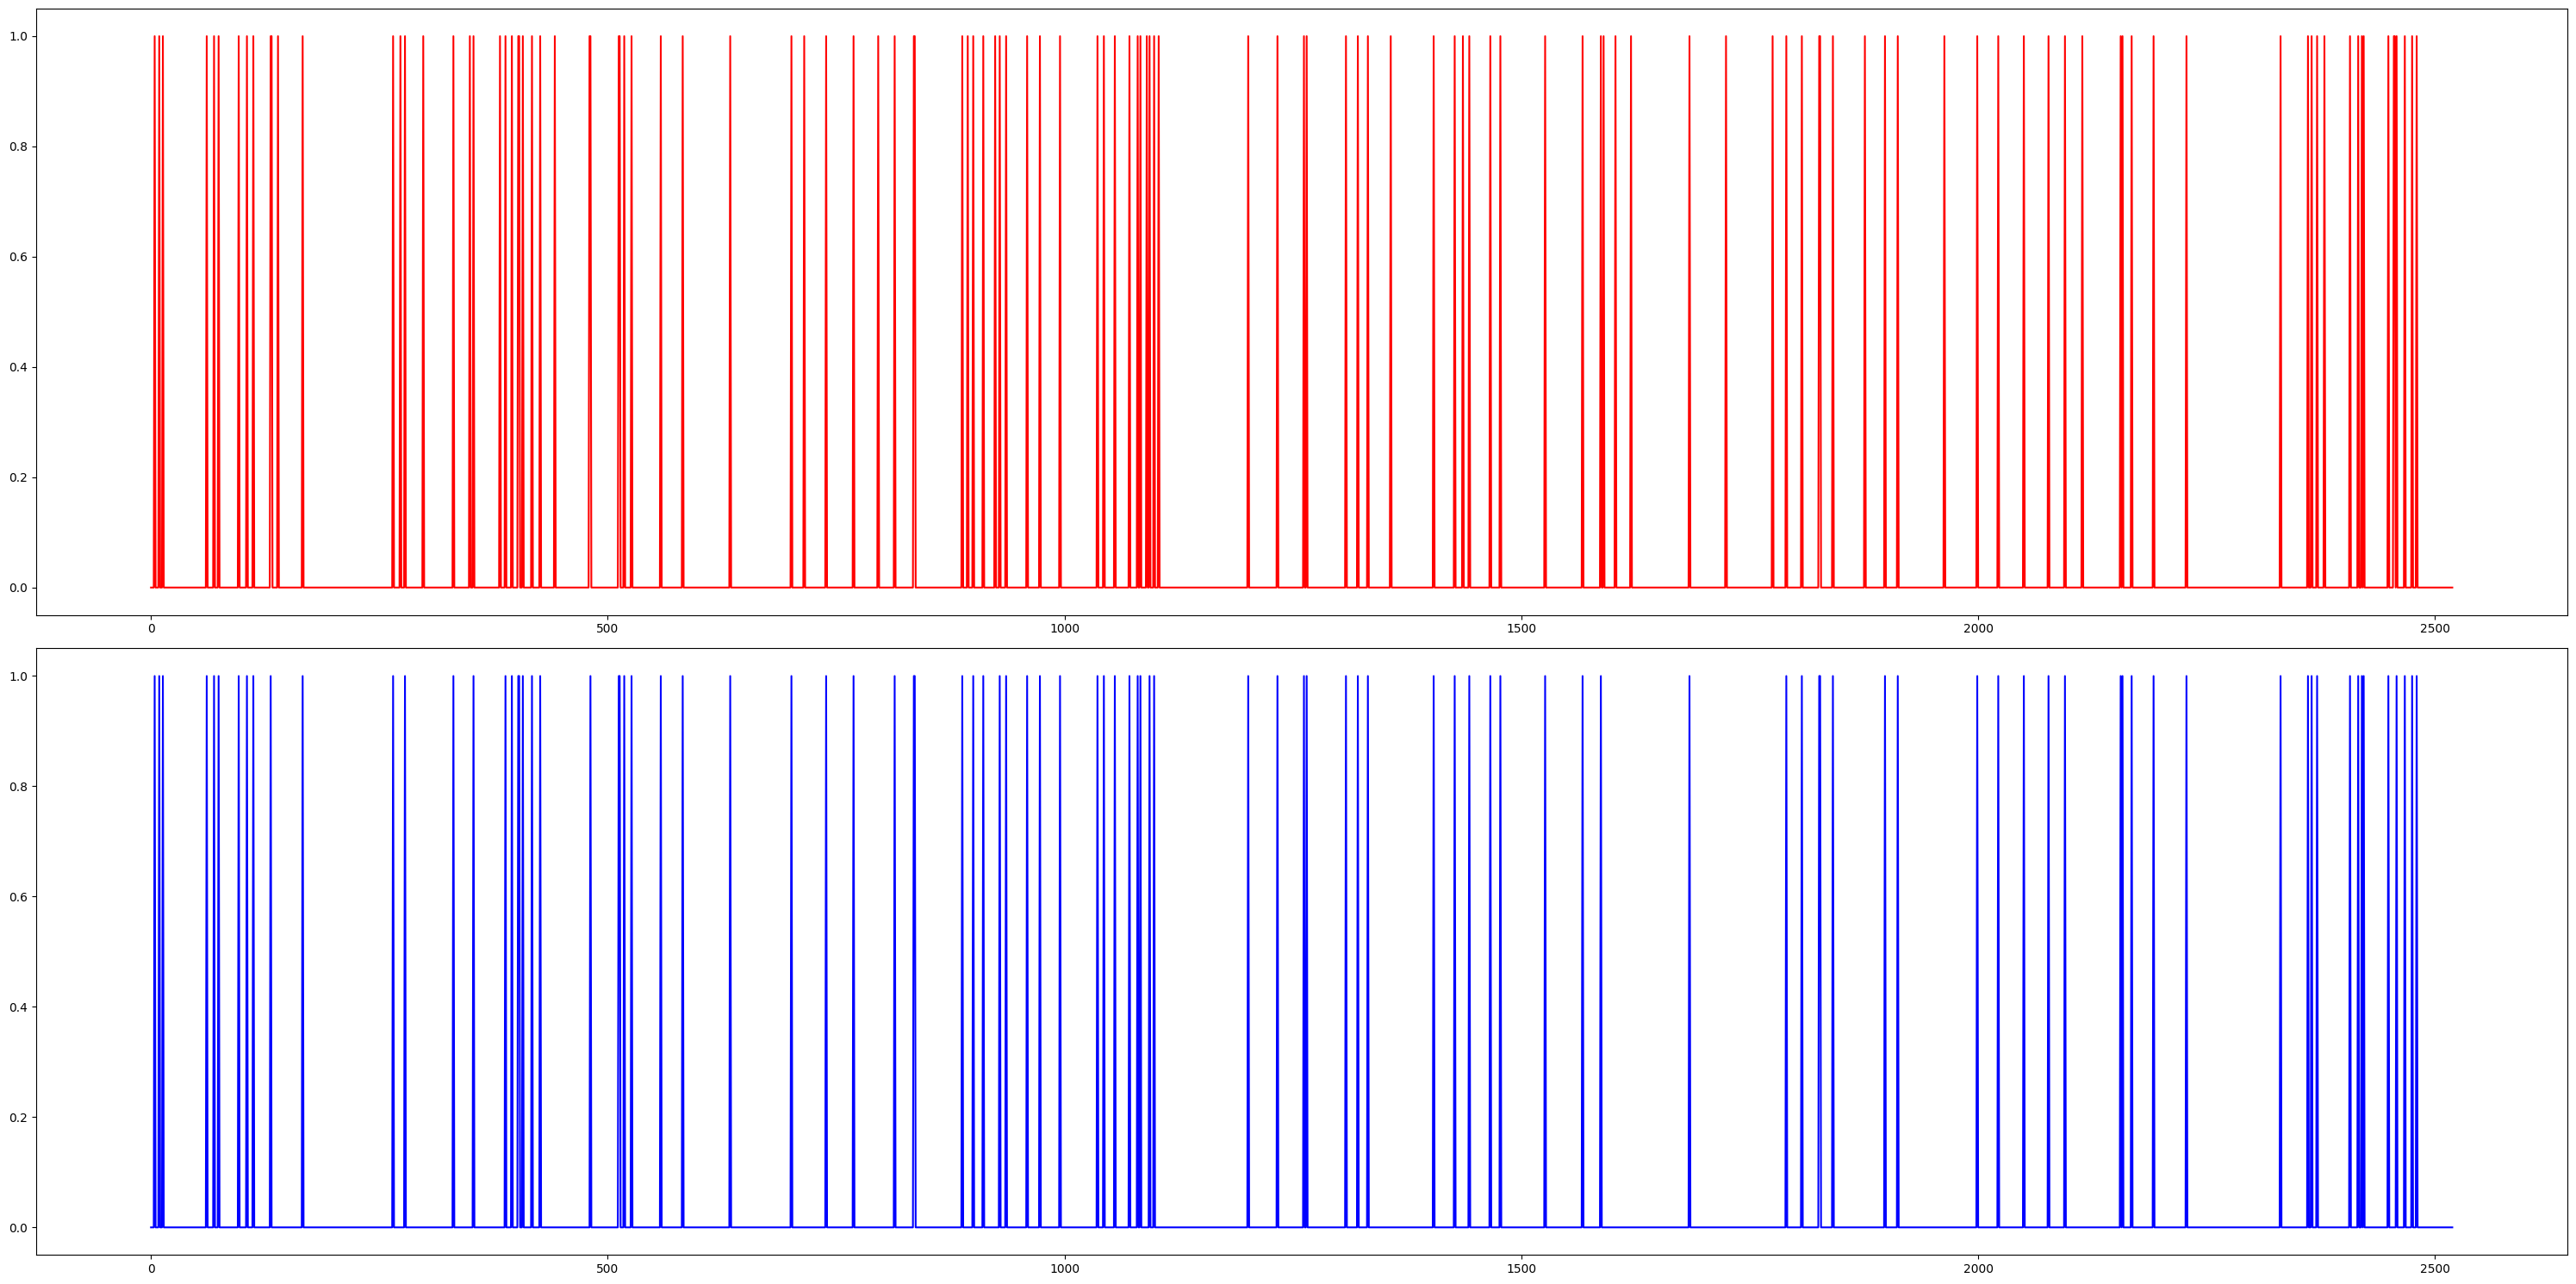

In [ ]:
# plot of predicted anomalies along with real labels in test set
fig, axs = plt.subplots(2)

fig.set_figwidth(30)
fig.set_figheight(15)

axs[0].plot(list(range(test_y.shape[0])), test_y, color='r')
axs[1].plot(list(range(test_y.shape[0])), pred_y, color='b')

fig.show()

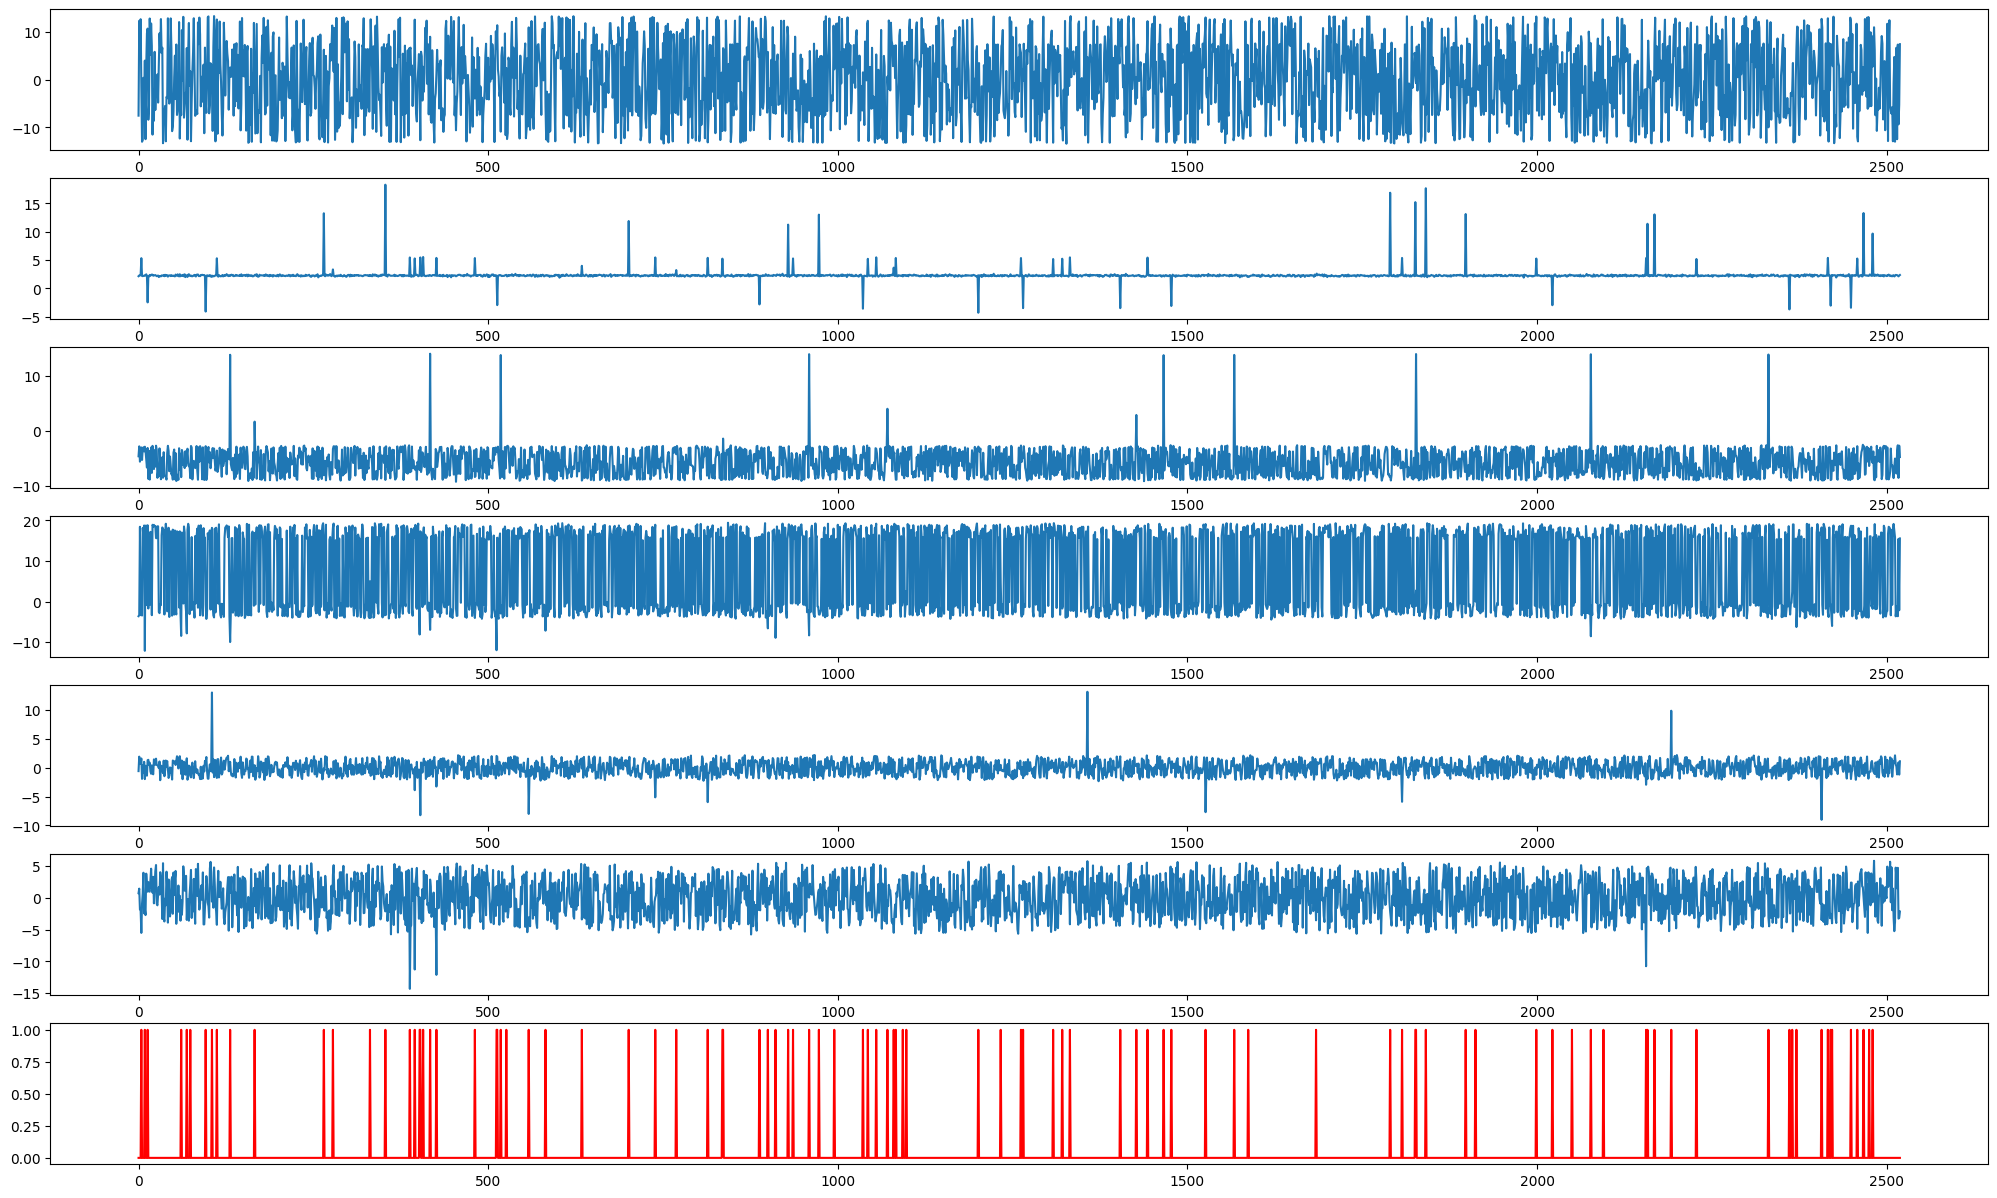

In [ ]:
# plot of the test_X set and their predicted labels

interval = list(range(test_y.shape[0]))
fig, axs = plt.subplots(7)

fig.set_figwidth(25)
fig.set_figheight(15)

for i in range(6):
  axs[i].plot(interval, test_X[str(i)])
axs[6].plot(interval, pred_y, color='r')

fig.show()